In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import mglearn

from IPython.display import display

%matplotlib inline

In [2]:
pd.options.display.max_rows = 20

In [3]:
original = pd.read_csv('train.csv', index_col='PassengerId')
original

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [4]:
original.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data = original.copy()
data['Age'] = data.Age.fillna(data.Age.mean())
X = data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
y = data['Survived']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [7]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X_train, y_train)
print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.708083832335
test score:  0.695067264574


In [8]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LogisticRegression(), X, y, cv=10, scoring='accuracy')
print(scores)
print("Mean: {}".format(scores.mean()))
print("Std:  {}".format(scores.std()))

[ 0.63333333  0.65555556  0.71910112  0.70786517  0.73033708  0.71910112
  0.71910112  0.70786517  0.69662921  0.75      ]
Mean: 0.7038888888888889
Std:  0.0330431529692849


In [9]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=0).fit(X_train, y_train)
print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.943113772455
test score:  0.686098654709


In [10]:
scores = cross_val_score(RandomForestClassifier(), X_test, y_test, cv=10, scoring='accuracy')
print(scores)
print("Mean: {}".format(scores.mean()))
print("Std:  {}".format(scores.std()))

[ 0.60869565  0.7826087   0.60869565  0.69565217  0.69565217  0.56521739
  0.72727273  0.71428571  0.71428571  0.66666667]
Mean: 0.6779032561641257
Std:  0.06251538882486862


In [11]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

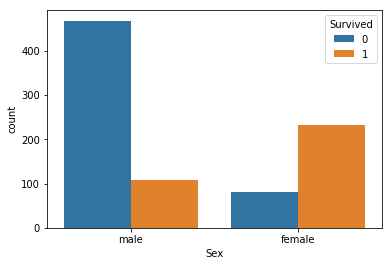

In [12]:
sns.countplot('Sex', hue='Survived', data=data);

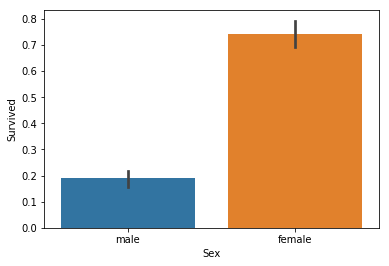

In [13]:
ax = sns.barplot(x="Sex", y="Survived", data=data)

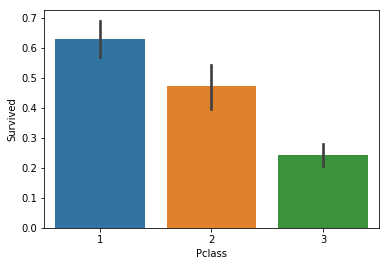

In [14]:
ax = sns.barplot(x="Pclass", y="Survived", data=data)

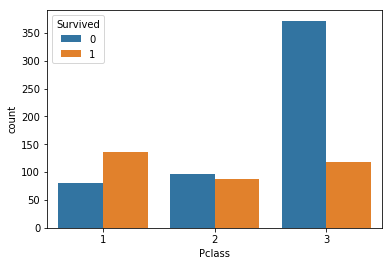

In [15]:
sns.countplot('Pclass', hue='Survived', data=data);

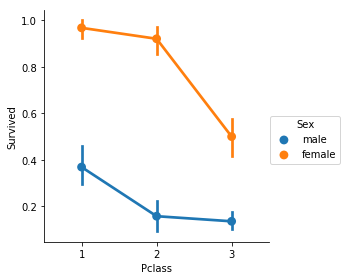

In [16]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()

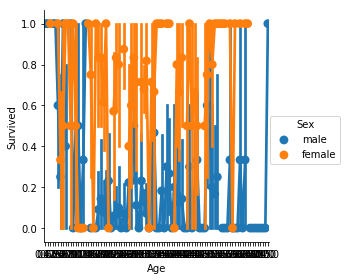

In [17]:
sns.factorplot('Age','Survived',hue='Sex',data=data)
plt.show()

In [18]:
original.isnull().sum().sort_values()

Survived      0
Pclass        0
Name          0
Sex           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
Age         177
Cabin       687
dtype: int64

In [19]:
data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.', expand=False)

In [20]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') 

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [21]:
data.groupby('Initial')['Age'].mean()

Initial
Capt        70.000000
Col         58.000000
Countess    33.000000
Don         40.000000
Dr          40.242731
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       7.086662
Miss        23.341584
Mlle        24.000000
Mme         24.000000
Mr          31.753762
Mrs         35.055080
Ms          28.000000
Rev         43.166667
Sir         49.000000
Name: Age, dtype: float64

In [22]:
data.groupby('Initial').count()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Initial,,,,,,,,,,,
Capt,1,1,1,1,1,1,1,1,1,1,1
Col,2,2,2,2,2,2,2,2,2,1,2
Countess,1,1,1,1,1,1,1,1,1,1,1
Don,1,1,1,1,1,1,1,1,1,0,1
Dr,7,7,7,7,7,7,7,7,7,3,7
Jonkheer,1,1,1,1,1,1,1,1,1,0,1
Lady,1,1,1,1,1,1,1,1,1,1,1
Major,2,2,2,2,2,2,2,2,2,2,2
Master,40,40,40,40,40,40,40,40,40,7,40


In [23]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [24]:
data.groupby('Initial').count()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Initial,,,,,,,,,,,
Master,40,40,40,40,40,40,40,40,40,7,40
Miss,186,186,186,186,186,186,186,186,186,50,185
Mr,529,529,529,529,529,529,529,529,529,100,529
Mrs,127,127,127,127,127,127,127,127,127,46,126
Other,9,9,9,9,9,9,9,9,9,1,9


In [25]:
data.groupby('Initial')['Age'].mean()

Initial
Master     7.086662
Miss      23.377249
Mr        32.049894
Mrs       35.140827
Other     45.888889
Name: Age, dtype: float64

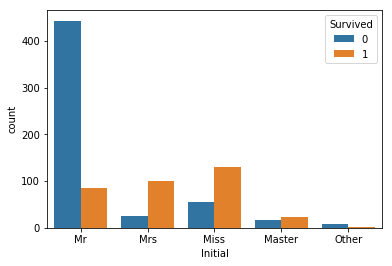

In [26]:
sns.countplot('Initial', hue='Survived', data=data);

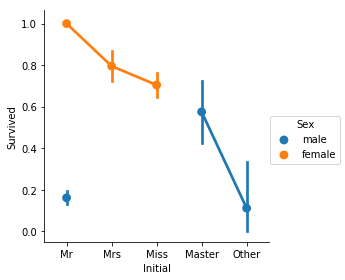

In [27]:
sns.factorplot('Initial','Survived',hue='Sex',data=data)
plt.show()

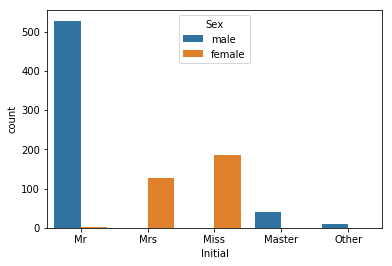

In [28]:
sns.countplot('Initial', hue='Sex', data=data);

In [29]:
data.loc[(data['Sex'] == 'female') & (data['Initial'] == 'Mr')]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
PassengerId,,,,,,,,,,,,
797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,Mr


In [30]:
data.loc[(data['Sex'] == 'female') & (data['Initial'] == 'Mr'), 'Initial']='Miss'

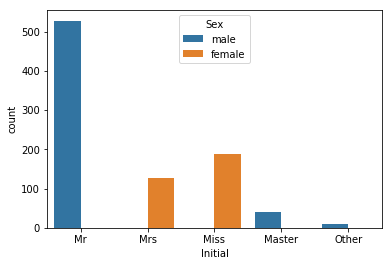

In [31]:
sns.countplot('Initial', hue='Sex', data=data);

In [32]:
data.groupby('Initial')['Age'].mean()

Initial
Master     7.086662
Miss      23.514269
Mr        32.017792
Mrs       35.140827
Other     45.888889
Name: Age, dtype: float64

In [33]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=32
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=35
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=7
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=24
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [34]:
data.isnull().sum().sort_values()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Initial       0
Embarked      2
Cabin       687
dtype: int64

In [35]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Mr
6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q,Mr
7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,Mr
8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,Master
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,Mrs


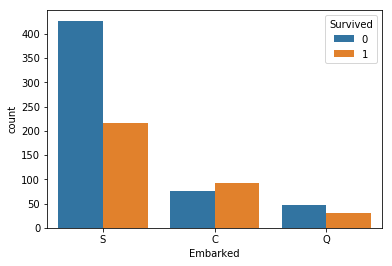

In [36]:
sns.countplot('Embarked', hue='Survived', data=data);

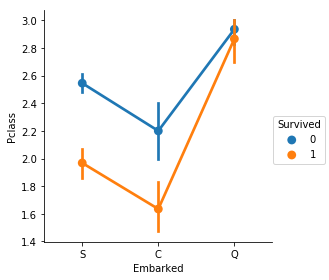

In [37]:
sns.factorplot('Embarked','Pclass', hue='Survived', data=data);

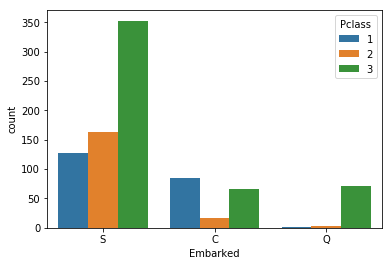

In [38]:
sns.countplot('Embarked', hue='Pclass', data=data);

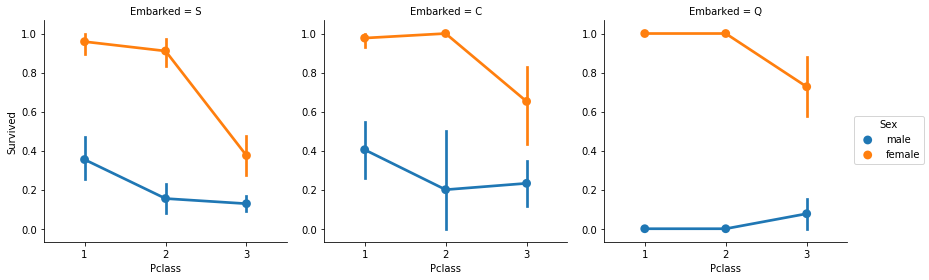

In [39]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()

In [40]:
data['Embarked'].fillna('S',inplace=True)

In [41]:
data.isnull().sum().sort_values()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
Initial       0
Cabin       687
dtype: int64

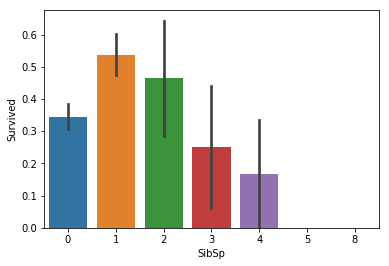

In [42]:
ax = sns.barplot(x="SibSp", y="Survived", data=data)

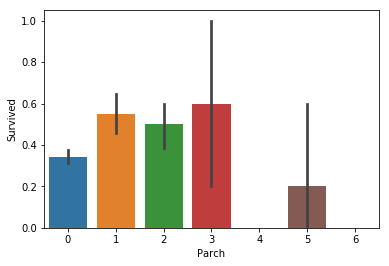

In [43]:
ax = sns.barplot(x="Parch", y="Survived", data=data)

In [44]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1#Alone

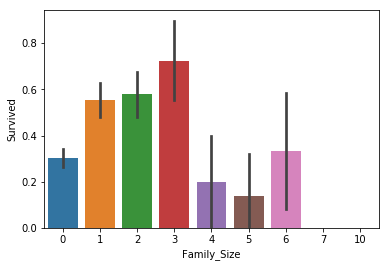

In [45]:
ax = sns.barplot(x="Family_Size", y="Survived", data=data)

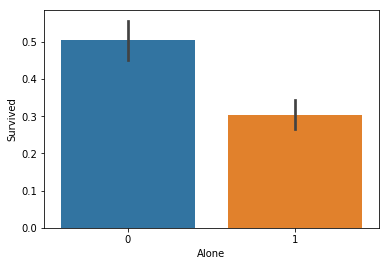

In [46]:
ax = sns.barplot(x="Alone", y="Survived", data=data)

In [47]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079686


In [48]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Family_Size,Alone
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Mr,1,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs,1,0
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Mrs,1,0
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Mr,0,1
6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q,Mr,0,1
7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,Mr,0,1
8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,Master,4,0
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,Mrs,2,0


In [49]:
pd.qcut(data['Fare'],4)

PassengerId
1       (-0.001, 7.91]
2      (31.0, 512.329]
3       (7.91, 14.454]
4      (31.0, 512.329]
5       (7.91, 14.454]
6       (7.91, 14.454]
7      (31.0, 512.329]
8       (14.454, 31.0]
9       (7.91, 14.454]
10      (14.454, 31.0]
            ...       
882     (-0.001, 7.91]
883     (7.91, 14.454]
884     (7.91, 14.454]
885     (-0.001, 7.91]
886     (14.454, 31.0]
887     (7.91, 14.454]
888     (14.454, 31.0]
889     (14.454, 31.0]
890     (14.454, 31.0]
891     (-0.001, 7.91]
Name: Fare, Length: 891, dtype: category
Categories (4, interval[float64]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]]

In [50]:
# data.groupby(pd.qcut(data['Fare'],5))['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

In [51]:
# data['Fare_band']=0
# data.loc[data['Fare']<=7.85,'Fare_band']=0
# data.loc[(data['Fare']>7.85)&(data['Fare']<=10.5),'Fare_band']=1
# data.loc[(data['Fare']>10.5)&(data['Fare']<=21.67),'Fare_band']=2
# data.loc[(data['Fare']>21.67)&(data['Fare']<=39.68),'Fare_band']=3
# data.loc[data['Fare']>39.68,'Fare_band']=4

In [52]:
# data.groupby(pd.qcut(data['Age'],5, precision=0))['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')
data['Age_band']=0
data.loc[data['Age']<=20,'Age_band']=0
data.loc[(data['Age']>20)&(data['Age']<=30),'Age_band']=1
data.loc[(data['Age']>28)&(data['Age']<=40),'Age_band']=2
data.loc[(data['Age']>30)&(data['Age']<=38),'Age_band']=3
data.loc[data['Age']>38,'Age_band']=4

In [53]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

In [54]:
data.drop(['Name','Age','Ticket','Fare','Cabin'],axis=1,inplace=True)

In [55]:
data

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Family_Size,Alone,Age_band
PassengerId,,,,,,,,,,
1,0,3,0,1,0,0,0,1,0,1
2,1,1,1,1,0,1,1,1,0,3
3,1,3,1,0,0,0,2,0,1,1
4,1,1,1,1,0,0,1,1,0,3
5,0,3,0,0,0,0,0,0,1,3
6,0,3,0,0,0,2,0,0,1,2
7,0,1,0,0,0,0,0,0,1,4
8,0,3,0,3,1,0,3,4,0,0
9,1,3,1,0,2,0,1,2,0,1


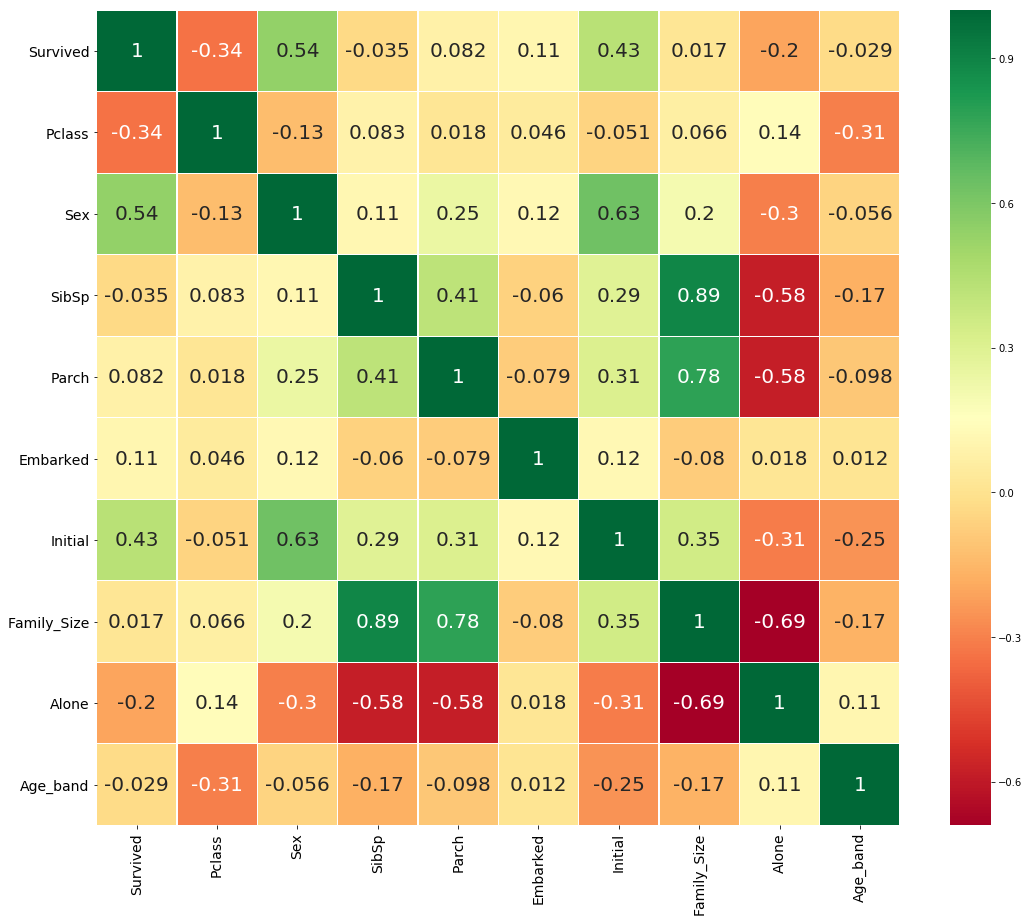

In [56]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [57]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure


In [58]:
X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [59]:
X_train

,Pclass,Sex,SibSp,Parch,Embarked,Initial,Family_Size,Alone,Age_band
PassengerId,,,,,,,,,
672,1,0,1,0,0,0,1,0,3
418,2,1,0,2,0,2,2,0,0
635,3,1,3,2,0,2,5,0,0
324,2,1,1,1,0,1,2,0,1
380,3,0,0,0,0,0,0,1,0
251,3,0,0,0,0,0,0,1,2
652,2,1,0,1,0,2,1,0,0
75,3,0,0,0,0,0,0,1,3
219,1,1,0,0,1,2,0,1,3


In [60]:
model = LogisticRegression()
model.fit(X_train, y_train)

print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.809880239521
test score:  0.798206278027


In [61]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

In [62]:
X_new = data.drop('Survived', axis=1)
y_new = data['Survived']

X_trans = enc.fit_transform(X_new)
X_train_trans, X_test_trans, y_new_train, y_new_test = train_test_split(X_trans, y_new, random_state=0, stratify=y)

In [63]:
print(X_train_trans.shape)

(668, 43)


In [64]:
print(X_test_trans.shape)

(223, 43)


In [65]:
model.fit(X_train_trans, y_new_train)

print("train score:", model.score(X_train_trans, y_new_train))
print("test score: ", model.score(X_test_trans, y_new_test))

train score: 0.845808383234
test score:  0.834080717489


In [66]:
for c in [0.001, 0.003, 0.006, 0.1, 0.3, 0.6, 1.0, 3.0, 6.0]:
    model = LogisticRegression(C=c)
    model.fit(X_train_trans, y_new_train)
    
    print("C={:f} train: {:f} test: {:f}".format(c, model.score(X_train_trans, y_new_train), model.score(X_test_trans, y_new_test)))

C=0.001000 train: 0.724551 test: 0.717489
C=0.003000 train: 0.741018 test: 0.757848
C=0.006000 train: 0.775449 test: 0.766816
C=0.100000 train: 0.827844 test: 0.820628
C=0.300000 train: 0.842814 test: 0.825112
C=0.600000 train: 0.844311 test: 0.834081
C=1.000000 train: 0.845808 test: 0.834081
C=3.000000 train: 0.844311 test: 0.829596
C=6.000000 train: 0.845808 test: 0.829596


In [67]:
model = LogisticRegression(C=1)
model.fit(X_train_trans, y_new_train)

print("train score:", model.score(X_train_trans, y_new_train))
print("test score: ", model.score(X_test_trans, y_new_test))

train score: 0.845808383234
test score:  0.834080717489


In [68]:
model = RandomForestClassifier(random_state=0).fit(X_train, y_train)
print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.884730538922
test score:  0.825112107623


In [69]:
from sklearn.model_selection import GridSearchCV

search = GridSearchCV(model, {'n_estimators': [10, 30, 50, 70, 100],
                              'max_depth': [2, 4, 6, 8, 10, 12, 15]})
search.fit(X, y)

pd.DataFrame(search.cv_results_)[['rank_test_score', 'mean_test_score', 'params']].sort_values(by='rank_test_score').head(10)

c:\users\bobi\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\bobi\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\bobi\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warni

,rank_test_score,mean_test_score,params
8,1,0.832772,"{'max_depth': 4, 'n_estimators': 70}"
7,1,0.832772,"{'max_depth': 4, 'n_estimators': 50}"
6,3,0.831650,"{'max_depth': 4, 'n_estimators': 30}"
9,3,0.831650,"{'max_depth': 4, 'n_estimators': 100}"
5,5,0.828283,"{'max_depth': 4, 'n_estimators': 10}"
14,6,0.823793,"{'max_depth': 6, 'n_estimators': 100}"
12,7,0.821549,"{'max_depth': 6, 'n_estimators': 50}"
13,8,0.820426,"{'max_depth': 6, 'n_estimators': 70}"
10,9,0.819304,"{'max_depth': 6, 'n_estimators': 10}"
11,10,0.815937,"{'max_depth': 6, 'n_estimators': 30}"


In [70]:
model = RandomForestClassifier(max_depth=4, n_estimators=70, random_state=0).fit(X_train, y_train)
print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.842814371257
test score:  0.820627802691


In [71]:
model = RandomForestClassifier(random_state=0).fit(X_train_trans, y_new_train)
print("train score:", model.score(X_train_trans, y_new_train))
print("test score: ", model.score(X_test_trans, y_new_test))

train score: 0.883233532934
test score:  0.816143497758


In [72]:
from sklearn.model_selection import GridSearchCV

search = GridSearchCV(model, {'n_estimators': [10, 30, 50, 70, 100],
                              'max_depth': [2, 4, 6, 8, 10, 12, 15]})
search.fit(X_trans, y_new)

pd.DataFrame(search.cv_results_)[['rank_test_score', 'mean_test_score', 'params']].sort_values(by='rank_test_score').head(10)

c:\users\bobi\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\bobi\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\bobi\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warni

,rank_test_score,mean_test_score,params
5,1,0.822671,"{'max_depth': 4, 'n_estimators': 10}"
14,2,0.820426,"{'max_depth': 6, 'n_estimators': 100}"
8,3,0.819304,"{'max_depth': 4, 'n_estimators': 70}"
7,4,0.818182,"{'max_depth': 4, 'n_estimators': 50}"
9,5,0.817059,"{'max_depth': 4, 'n_estimators': 100}"
13,5,0.817059,"{'max_depth': 6, 'n_estimators': 70}"
10,7,0.815937,"{'max_depth': 6, 'n_estimators': 10}"
12,8,0.814815,"{'max_depth': 6, 'n_estimators': 50}"
6,8,0.814815,"{'max_depth': 4, 'n_estimators': 30}"
11,10,0.805836,"{'max_depth': 6, 'n_estimators': 30}"


In [73]:
model = RandomForestClassifier(max_depth=4, n_estimators=10, random_state=0).fit(X_train_trans, y_new_train)
print("train score:", model.score(X_train_trans, y_new_train))
print("test score: ", model.score(X_test_trans, y_new_test))

train score: 0.814371257485
test score:  0.816143497758


In [74]:
model=KNeighborsClassifier(n_neighbors=8) 
model.fit(X_train,y_train)
print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.830838323353
test score:  0.829596412556


In [75]:
model=KNeighborsClassifier(n_neighbors=9) 
model.fit(X_train_trans,y_new_train)
print("train score:", model.score(X_train_trans, y_new_train))
print("test score: ", model.score(X_test_trans, y_new_test))

train score: 0.835329341317
test score:  0.798206278027


In [76]:
from sklearn.model_selection import GridSearchCV

search = GridSearchCV(model, {'n_neighbors': [3, 5,8,9,7, 10,11, 15, 20]})
search.fit(X_trans, y_new)

pd.DataFrame(search.cv_results_)[['rank_test_score', 'mean_test_score', 'params']].sort_values(by='rank_test_score').head(10)

c:\users\bobi\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\bobi\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\bobi\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warni

,rank_test_score,mean_test_score,params
3,1,0.815937,{'n_neighbors': 9}
6,2,0.811448,{'n_neighbors': 11}
5,3,0.810325,{'n_neighbors': 10}
2,4,0.809203,{'n_neighbors': 8}
4,5,0.808081,{'n_neighbors': 7}
1,6,0.801347,{'n_neighbors': 5}
7,6,0.801347,{'n_neighbors': 15}
8,8,0.799102,{'n_neighbors': 20}
0,9,0.790123,{'n_neighbors': 3}


In [77]:
model=svm.SVC(kernel='rbf')
model.fit(X_train,y_train)
print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.835329341317
test score:  0.816143497758


In [78]:
model=svm.SVC(kernel='rbf')
model.fit(X_train_trans,y_new_train)
print("train score:", model.score(X_train_trans, y_new_train))
print("test score: ", model.score(X_test_trans, y_new_test))

train score: 0.821856287425
test score:  0.793721973094


In [79]:
model=svm.SVC(kernel='linear')
model.fit(X_train,y_train)
print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.806886227545
test score:  0.793721973094


In [80]:
model=svm.SVC(kernel='linear')
model.fit(X_train_trans,y_new_train)
print("train score:", model.score(X_train_trans, y_new_train))
print("test score: ", model.score(X_test_trans, y_new_test))

train score: 0.833832335329
test score:  0.811659192825


In [81]:
model=DecisionTreeClassifier(max_depth=6)
model.fit(X_train_trans,y_new_train)
print("train score:", model.score(X_train_trans, y_new_train))
print("test score: ", model.score(X_test_trans, y_new_test))

train score: 0.850299401198
test score:  0.816143497758


In [88]:
model=DecisionTreeClassifier(max_depth=4)
model.fit(X_train,y_train)
print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.841317365269
test score:  0.834080717489


In [83]:
from sklearn.model_selection import GridSearchCV

search = GridSearchCV(model, {'max_depth': [2, 4, 6,7, 8, 10, 12, 15]})
search.fit(X_trans, y_new)

pd.DataFrame(search.cv_results_)[['rank_test_score', 'mean_test_score', 'params']].sort_values(by='rank_test_score').head(10)

c:\users\bobi\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\bobi\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\bobi\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warni

,rank_test_score,mean_test_score,params
2,1,0.805836,{'max_depth': 6}
1,2,0.801347,{'max_depth': 4}
3,3,0.790123,{'max_depth': 7}
0,4,0.784512,{'max_depth': 2}
4,4,0.784512,{'max_depth': 8}
7,4,0.784512,{'max_depth': 15}
6,7,0.783389,{'max_depth': 12}
5,8,0.781145,{'max_depth': 10}


In [89]:
data = pd.read_csv('test.csv', index_col='PassengerId')

data['Age'] = data.Age.fillna(data.Age.mean())
data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.', expand=False)
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Miss'],inplace=True)

data.loc[(data['Sex'] == 'female') & (data['Initial'] == 'Mr'), 'Initial']='Miss'

# data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=32
# data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=35
# data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=7
# data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=24
# data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

data['Embarked'].fillna('S',inplace=True)

data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1#Alone

data['Age_band']=0
data.loc[data['Age']<=20,'Age_band']=0
data.loc[(data['Age']>20)&(data['Age']<=30),'Age_band']=1
data.loc[(data['Age']>28)&(data['Age']<=40),'Age_band']=2
data.loc[(data['Age']>30)&(data['Age']<=38),'Age_band']=3
data.loc[data['Age']>38,'Age_band']=4
data
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

data.drop(['Name','Age','Ticket','Fare','Cabin'],axis=1,inplace=True)

# from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder(sparse=False)

# data_trans = enc.fit_transform(data)

# print(data_trans.shape)

predictions = model.predict(data)
frame = pd.DataFrame({
    'PassengerId': pd.read_csv('test.csv').PassengerId,
    'Survived': predictions
})
frame = frame.set_index('PassengerId')
frame.to_csv('~/Desktop/predictions.csv')
frame.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
